In [1]:
from graspy.match import GraphMatch as GMP
from graspy.simulations import sbm_corr
from graspy.embed import AdjacencySpectralEmbed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from joblib import Parallel, delayed
import seaborn as sns

In [3]:
from qap_sim import quadratic_assignment_sim

# Experiment Summary
Let $(G_1, G_2) \sim \rho-SBM(\vec{n},B)$. (NB: binary, symmetric, hollow.) \
$K = 3$. \
the marginal SBM is {\em{conditional}} on block sizes $\vec{n}=[n_1,n_2,n_3]$. \
$B = [(.20,.01,.01);(.01,.10,.01);(.01,.01,.20)]$. (NB: rank($B$)=3 with evalues $\approx [0.212,0.190,0.098]$.) \
with $n = 150$ and $\vec{n}=[n_1,n_2,n_3] = [50,50,50]$ \
for each $\rho \in \{0,0.1,\cdots,0.9,1.0\}$ generate $r$ replicates $(G_1, G_2)$. \
For all $r$ replicates, run $GM$ and $GM_{SS}$ each $t$ times, \
with each $t$ corresponding to a different random permutation on $G_2$. \
Specifically,$G_2' = Q G_2 Q^T,$ where $Q$ is sampled uniformly from the set of $n x n$ permutations matrices. \
For each $t$ permutation, run $GM$ & $GM_{SS}$ from the barycenter \
For each $r$, the $t$ permutation with the highest associated objective function value will have it's match ratio recorded \
For any $\rho$ value, have $\delta$ denote the average match ratio over the $r$ realizations \
Plot $x=\rho$ vs $y$= $\delta$ $\pm$ 2s.e.
This notebook contains figures for $r=50$, $t=20$

# Description of $GM_{ss}$ Procedure
For each $r$, ASE each graph into $d=3$ yielding $Xhat_1$ & $Xhat_2$ \
MedianFlip both into the first orthant yielding $Xhathat_1$ & $Xhathat_2$ \
let $Phat = Xhathat_1 Xhathat_2^T$ and run $t$ repititions of gm with $G_1,G_2 and Phat$ as the similarity. \

In [4]:
def match_ratio(inds, n):
    return np.count_nonzero(inds == np.arange(n)) / n
n = 150
m = 1
t = 10
rhos = 0.1 * np.arange(11)
ratios2 = np.zeros((11,m))
scores2 = np.zeros((11,m))
n_per_block = int(n/3)
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.2, 0.01, 0.01], [0.01, 0.1, 0.01], [0.01, 0.01, 0.2]])
directed = False
loops = False

In [83]:

n = 150
m = 50
t = 20
rhos = 0.1 * np.arange(11)
ratios = np.zeros((11,m))
scores = np.zeros((11,m))

ratios_ss = np.zeros((11,m))
scores_ss = np.zeros((11,m))

n_per_block = int(n/3)
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.2, 0.01, 0.01], [0.01, 0.1, 0.01], [0.01, 0.01, 0.2]])
directed = False
loops = False


#np.random.seed(8888)
for k, rho in enumerate(rhos):

    for i in range(m):

        A1, A2 = sbm_corr(
            block_members, block_probs, rho, directed=directed, loops=loops
        )
        score = 0
        res_opt = None
        
        score_ss = 0
        res_opt_ss = None
        
        for j in range(t):
            seed = k+m+t
            res = quadratic_assignment_sim(A1,A2, sim=False, maximize=True, options={'seed':seed})
            if res['score']>score:
                res_opt = res
                score = res['score']
            
            res = quadratic_assignment_sim(A1,A2, sim=True, maximize=True, options={'seed':seed})
            if res['score']>score_ss:
                res_opt_ss = res
                score_ss = res['score']
                
        ratios[k,i] = match_ratio(res_opt['col_ind'], n)
        scores[k,i] = res_opt['score']
        
        ratios_ss[k,i] = match_ratio(res_opt_ss['col_ind'], n)
        scores_ss[k,i] = res_opt_ss['score']
    #ratios[k] = ratios[k]/m



/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/graspy/embed/ase.py:157: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings

In [88]:
from scipy.stats import sem

error = [2*sem(ratios[i,:]) for i in range(11)]
average = [np.mean(ratios[i,:] ) for i in range(11)]

error_ss = [2*sem(ratios_ss[i,:]) for i in range(11)]
average_ss = [np.mean(ratios_ss[i,:] ) for i in range(11)]


<ipython-input-109-82e0d8f53fc2>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('GM_GM+SS.png',fmt="png", dpi=150, facecolor="w", bbox_inches="tight", pad_inches=0.3)


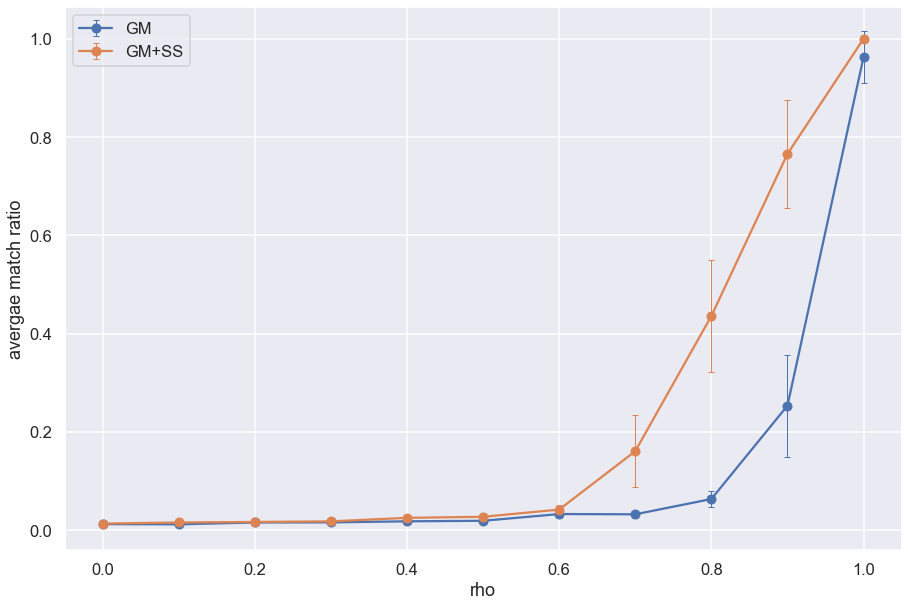

In [109]:
sns.set_context('talk')
#sns.set(rc={'figure.figsize':(15,10)})
plt.errorbar(rhos,average, error,marker='o',capsize=3, elinewidth=1, markeredgewidth=1, label='GM')
plt.errorbar(rhos,average_ss, error_ss,marker='o',capsize=3, elinewidth=1, markeredgewidth=1, label='GM+SS')
plt.xlabel("rho")
plt.ylabel("avergae match ratio")
plt.legend()
plt.savefig('GM_GM+SS.png',fmt="png", dpi=150, facecolor="w", bbox_inches="tight", pad_inches=0.3)

Text(0.5, 1.0, 'Paired Difference Histogram (Rho = 0.9)')

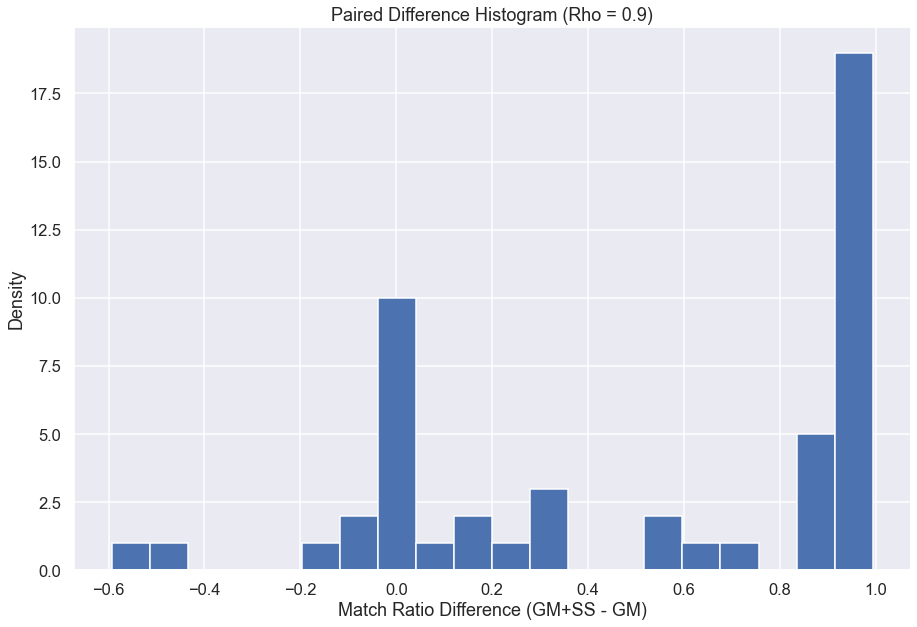

In [108]:
diff = ratios_ss[9,:] - ratios[9,:]
plt.hist(diff, bins=20)
plt.ylabel('Density')
plt.xlabel('Match Ratio Difference (GM+SS - GM)')
plt.title('Paired Difference Histogram (Rho = 0.9)')

In [107]:
print(ratios_ss[9,:])
print(ratios[9,:])

[0.9        1.         0.         1.         1.         0.59333333
 1.         1.         1.         1.         1.         0.04
 1.         1.         1.         1.         0.18       1.
 1.         1.         0.02666667 1.         0.06666667 0.16
 0.33333333 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.40666667 0.04       1.         1.         0.05333333
 1.         0.12666667 1.         0.03333333 0.98666667 1.
 0.33333333 1.        ]
[0.05333333 1.         0.45333333 0.04       1.         0.
 0.02666667 0.02       0.00666667 1.         0.01333333 0.
 1.         0.68666667 0.11333333 0.10666667 0.01333333 0.4
 0.01333333 0.06666667 0.03333333 0.00666667 0.12666667 0.00666667
 0.02666667 0.04       0.42       0.24666667 0.08       0.02666667
 0.08666667 0.12666667 0.01333333 1.         0.01333333 0.03333333
 0.06       1.         0.20666667 0.01333333 1.         0.08
 0.03333333 0.06       0.02       0.08666667

In [72]:
left_adj = np.genfromtxt('left_adj.csv', delimiter=',')
right_adj = np.genfromtxt('right_adj.csv', delimiter=',')


In [67]:
def median_sign_flips(X1, X2):
    X1_medians = np.median(X1, axis=0)
    X2_medians = np.median(X2, axis=0)
    val = np.multiply(X1_medians, X2_medians)
    t = (val > 0) * 2 - 1
    X1 = np.multiply(t.reshape(-1, 1).T, X1)
    return X1, X2